<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierSeries_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Series: Complex Coefficients
</h1></b>

Dr. Bingsen Wang

12/13/2023
</center>

#Complex Fourier Series

A function $f(x)$ can be decomposed into Fourier series with complex Fourier coefficients
$$f(x) = \sum_{n=-\infty}^{\infty}c_ne^{jn\omega x}\tag{1}$$
where the complex coefficient is determined by
$$c_n = \frac{1}{2\pi}\int_0^{2\pi} f(x)e^{-jn\omega x}\tag{2}$$

It is worth noting that $f(x)$ can be a complex function although $x$ is real. If f(x) is real, then $c_n = c_{-n}^*$ with $*$ deonoting the conjugate.

#Python Code
The Python code illustrates the complex Fourier series.

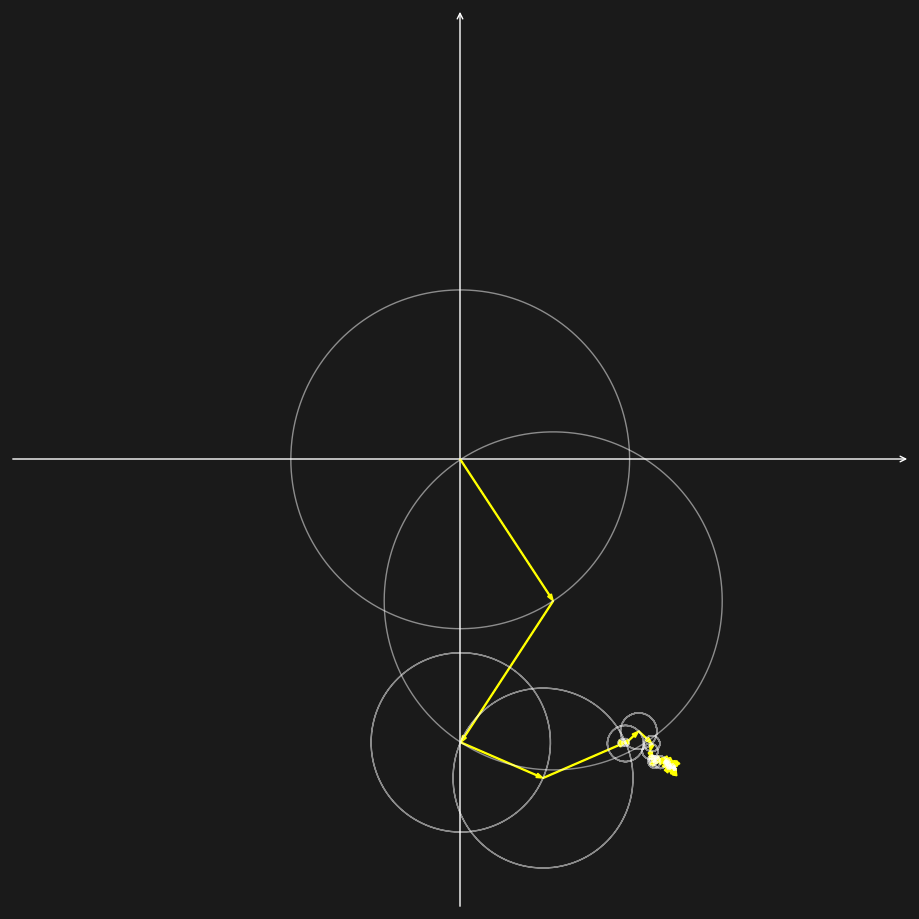

In [113]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,real, imag,heaviside,fft,array
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def rect(t,a,b): #rectagular shape: a-width, b-height, x-distance from (a-bj)
  x=t*2*(a+b)
  s1 = (1-heaviside(x-b,0))*( .5*a - 1j*.5*b + 1j*x) #segment 1
  s2 = (heaviside(x-b,0)-heaviside(x-(a+b),0))*(0.5*a + 1j*0.5*b-(x - b))
  s3 = (heaviside(x-(a+b),0)-heaviside(x-(a+2*b),0))*(-0.5*a + 1j*0.5*b - 1j*(x-a-b))
  s4 = heaviside(x-(a+2*b),0)*(-0.5*a - 1j*0.5*b + (x-2*b-a))
  stotal = s1 + s2 + s3 + s4
  return stotal

def zig(t,a,b): #zigzag shape: a-width, b-height, x-distance from (a-bj)
  c=(a**2 + b**2)**.5
  x=t*2*(a+c)
  s1 = (1-heaviside(x-c,0))*( .5*a - 1j*.5*b + (-a+1j*b)/c*x) #segment 1
  s2 = (heaviside(x-c,0)-heaviside(x-(a+c),0))*(-0.5*a + 1j*0.5*b+(x - c))
  s3 = (heaviside(x-(a+c),0)-heaviside(x-(a+2*c),0))*(0.5*a + 1j*0.5*b + (-a-1j*b)/c*(x-a-c))
  s4 = heaviside(x-(a+2*c),0)*(-0.5*a - 1j*0.5*b + (x-2*c-a))
  stotal = s1 + s2 + s3 + s4
  return stotal

def fftcplx(zt):
  rt = zt.real
  it = zt.imag
  return (fft.fft(rt) + 1j*fft.fft(it))/len(zt)

def recon(zfft,t,n):
  zrec = [] #len 2n+1
  radius = [] #radius
  for i in range(n+1):
    if i==0:
      zrec.append(zfft[i]+t*0)
      radius.append(0*t)
    else:
      radius.append(zfft[i]*exp(1j*2*pi*i*t))
      radius.append(zfft[-i]*exp(-1j*2*pi*i*t))

      zrec.append(zrec[2*i-2] + radius[2*i-1])
      zrec.append(zrec[2*i-1] + radius[2*i])
  return [zrec,radius]

def vectorDraw(ax,vecs,n,nn,colors): #nn vectors at nth instant
  ax.clear()
  ax.set_xlim(-1,1)
  ax.set_ylim(-1,1)
  ax.axis('off')
  for k in range(nn+1):
    center = vecs[0][k][n]
    ccl = vecs[1][k+1]
    radius = ccl[n]
    ax.arrow(center.real,center.imag,radius.real,radius.imag,
             width = 0.002,head_width=0.01,length_includes_head=True,color=colors[4])
    ax.plot(center.real+ccl.real,center.imag+ccl.imag,lw=1,color=colors[5],alpha=0.5)
  ax.plot(vecs[0][nn][:n].real,vecs[0][nn][:n].imag,lw=3,color=colors[1])

  return
#parameters
clst=['lightskyblue','violet','palegreen','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','navy','k',(.1,.1,.1),'w'] #colors light bg
Nf = 1024
a = 1
b = 1.4
t=linspace(0,1,1024)
# traj = rect(t,a,b)
traj = zig(t,a,b)
trajfft = fftcplx(traj)
trajrec = recon(trajfft,t,100)
fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 0, 1, 1], [-1,1], [-1,1]], #trajectory to trace
            [[0, 0, 1, 1], [-1,1], [-1,1]], #animated vectors
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['', ''],
        ['', ''],
        ] #variables for yx axes of each subplot

ax_lst=[] #axis list or the list of subplots
ytxt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  # line_lst.append(ax.plot([], [],color=clst[k+1], lw=2)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right',color=clst[-2]) #x-axis label
  ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],color=clst[k],size=20,va='center')) #y label

# animation function. This is called sequentially
def animate(i):
  k=18
  # line_lst[0].set_data(t,traj/(2*(a+b)))
  line_lst[0].set_data(traj[:i].real,traj[:i].imag)
  vectorDraw(ax_lst[1],trajrec,i,36,clst)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=200)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierSeries_complex.mp4"
writervideo = animation.FFMpegWriter(fps=50)
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# print(len(trajrec[0]))